# Serie A package demo notebook

#### imports

In [5]:
from seriea_pkg.data import dataset as data
from seriea_pkg.data.team_results import TeamResult
from seriea_pkg.services.football_api import FootballAPIClient

#### Setup API secret key and datasets dir (needed only once)

In [6]:
# FootballAPIClient.set_secret_key_path("<path-to-keyfile.txt>")
# data.set_default_datasets_path("<path-to-datasets-dir>")

In [7]:
season = data.load_dataset(2019)
ranking = season.ranking()
ranking

,PS,PS-AVG,P,W,D,L,GS,GS-M,GC,GC-M
Juventus,72,2.482759,29,23,3,3,59,4,25,3
Lazio,68,2.344828,29,21,5,3,66,5,28,3
Inter,61,2.178571,28,18,7,3,56,4,29,3
Atalanta,57,2.035714,28,17,6,5,80,7,39,3
AS Roma,48,1.714286,28,14,6,8,53,4,38,4
Napoli,45,1.607143,28,13,6,9,46,4,37,4
AC Milan,42,1.500000,28,12,6,10,34,4,35,5
Parma,39,1.392857,28,11,6,11,38,5,35,5
Verona,39,1.392857,28,10,9,9,34,3,32,3
Cagliari,38,1.357143,28,10,8,10,47,5,44,4


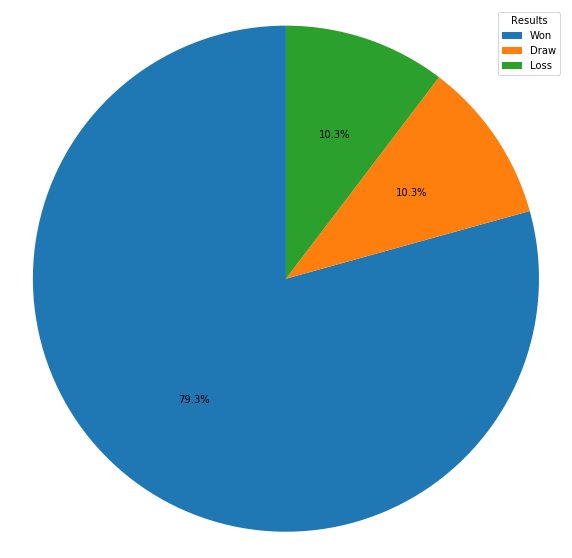

In [8]:
from seriea_pkg.graphics.single_team import SingleTeamGraphics

graphics = SingleTeamGraphics(season.compute_team_results('Juventus'))
graphics.roundsGraph()